# Exploratory Visualizations

In this notebook, we seek to perform some simply exploratory analysis for the sake of formulating and testing later hypotheses. In particular, we will explore how different factors contribute to **success rate** of attacks, and **how many** attacks there are based on factors such as region, weapon type, etc. 

## Setup

We've already created some preprocessing functions in ```preprocessing_functions.py```. We'll load the data and import some packages.

In [1]:
import pandas as pd 
from preprocess_functions import load_data_relevant_cols

In [2]:
raw = load_data_relevant_cols()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
sns.set_style('whitegrid')

## Success Rate Factors

The principal goal of our analysis is to understand the factors which lead to successful terrorist attacks. Therefore, we will first explore how the success rate of terrorist attacks differs with respect to certain *traits of interest* such as region or weapon used. This should inform a choice of model later on.

In [5]:
def get_success_tuples(attribute, min_number_attacks=0):
    '''
    Input: 
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    min_number_attacks: A cutoff value. If a category (such as a region) has less 
    than this number of attacks, it is not used. 
    
    Output: A list of tuples whose keys are the different values of attribute, 
    and values are the percentage of successful attacks in that category.
    '''
    attribute_vals = raw[attribute].unique()
    out = {}
    for val in attribute_vals: 
        df_subset = raw[raw[attribute] == val]
        if(len(df_subset) <= min_number_attacks or val == 'Unknown' or val == 'Other'): 
            continue 
        success_rate = sum(df_subset['success'])/(len(df_subset))
        out[val] = success_rate
    return sorted(out.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)

In [6]:
def plot_attribute_success(success_tuples, attribute, use_xticks = True):
    '''
    See get_success_tuples. 
    
    Input: 
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    success_tuples: A list of tuples whose keys are the different values of attribute, 
    and values are the percentage of successful attacks in that category. 
    use_xticks: A boolean. The plot displays x_ticks if true.
    
    Output: A bar plot of success rates in the success_rate, by key value. 
    '''
    fig = plt.figure(figsize=(12, 6))
    y_pos = np.arange(len(success_tuples))
    plt.bar(y_pos, [x[1] for x in success_tuples])
    
    if use_xticks: 
        plt.xticks(y_pos, [x[0] for x in success_tuples])
        plt.xticks(rotation=90)

    plt.ylabel('Success Rate')
    plt.title('Success Rate of Terrorist Attacks by {}'.format(attribute))
    plt.show();

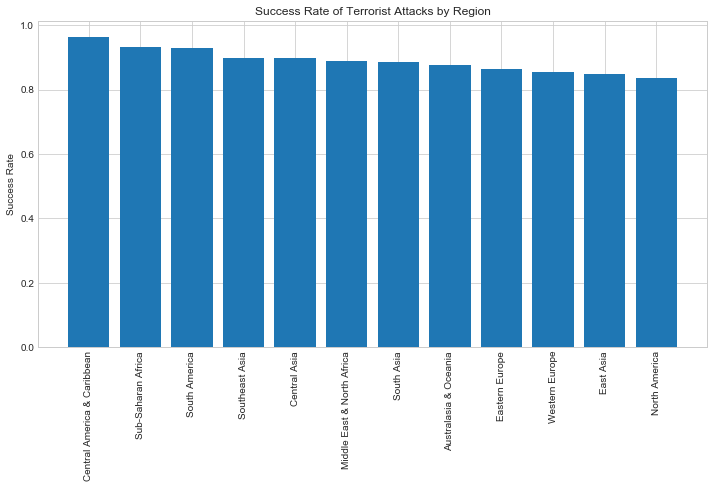

In [7]:
plot_attribute_success(get_success_tuples('region_txt', min_number_attacks=10), 'Region')

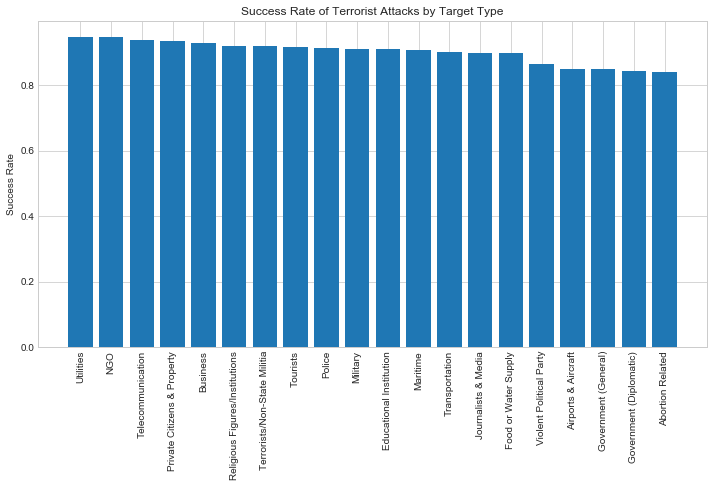

In [8]:
plot_attribute_success(get_success_tuples('targtype1_txt', min_number_attacks=10), 'Target Type')

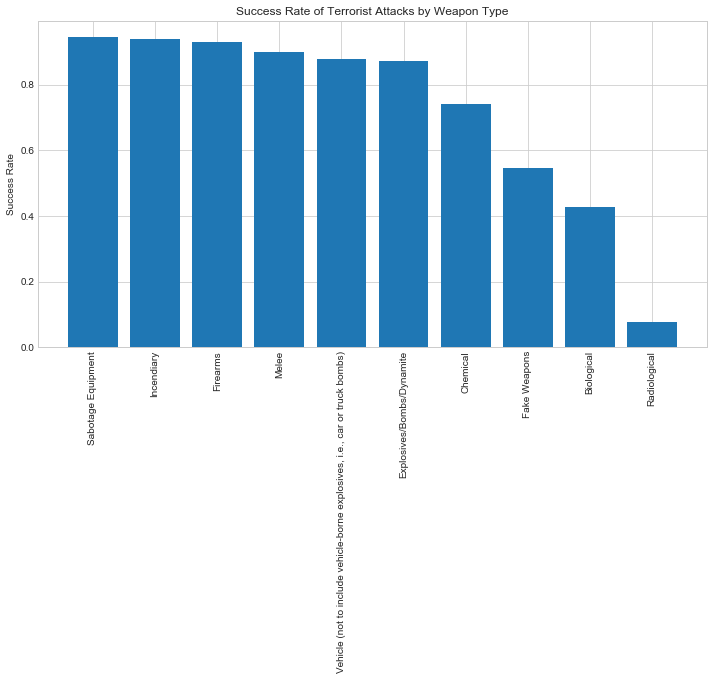

In [9]:
plot_attribute_success(get_success_tuples('weaptype1_txt'), 'Weapon Type')

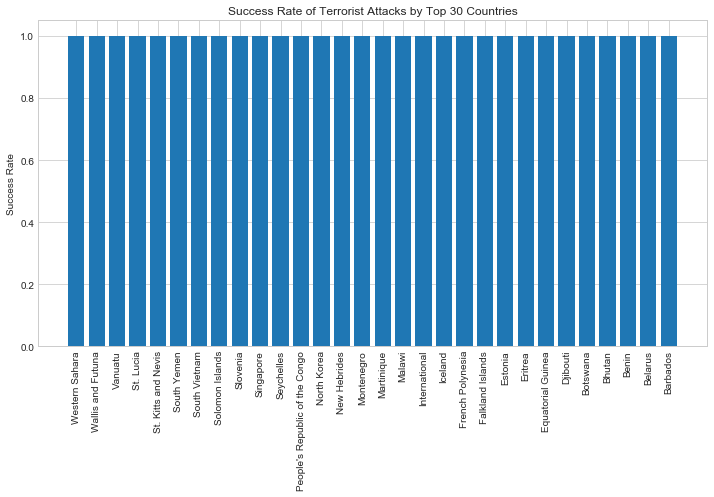

In [10]:
plot_attribute_success(get_success_tuples('country_txt')[:30], 'Top 30 Countries')

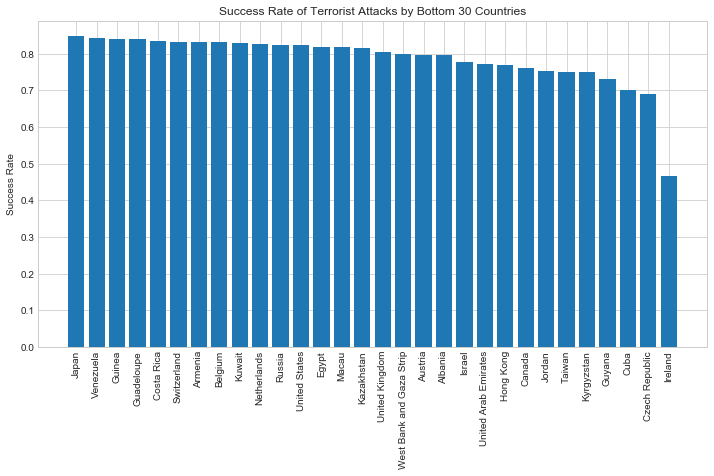

In [12]:
plot_attribute_success(get_success_tuples('country_txt', min_number_attacks=20)[-30:], 'Bottom 30 Countries')

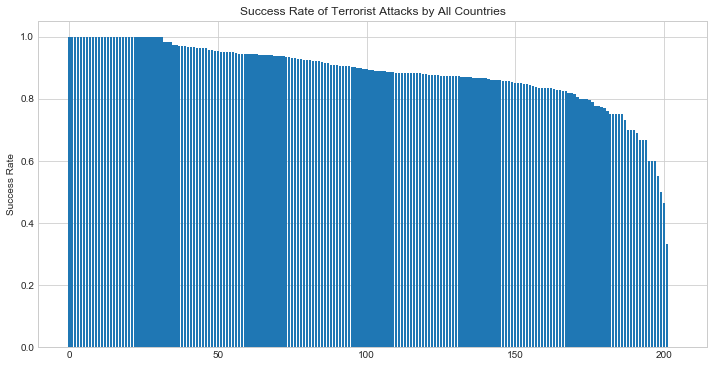

In [13]:
plot_attribute_success(get_success_tuples('country_txt'), 'All Countries', use_xticks=False)

### Discussion 

It seems that, with the possible exception of weapon type, there is not much variance in success rates across certain attributes. Success rate across different regions, targets, and nations always seems to hover around 80%. This makes analysis challenging because predictive algorithms might naively predict a successful attack almost all of the time, and still achieve a fairly high success rate. Therefore, we should perform analysis with the avoidance false positives in mind.

## Number of Attacks

In addition to tactical prevention of attacks, counterterrorism officials must address the issue of *resource allocation*. Given the potentially limitless number of targets and groups to contend with, it is critical that an overall strategy concentrate on the most common types of attacks. To this end, we will next explore the *number of attacks* with respect to the same traits of interest as before. 

In [37]:
def get_num_attacks_tuples(attribute, min_number_attacks = 0):
    '''
    Input: 
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    min_number_attacks: A cutoff point for the minimum number of attacks. 
    Any category with fewer attacks will not be returned.
    
    Output: A list of tuples whose keys are the different values of attribute, 
    and values are the number of attacks in that category.
    '''
    attribute_vals = raw[attribute].unique()
    out = {}
    for val in attribute_vals: 
        df_subset = raw[raw[attribute] == val]
        num_attacks = len(df_subset)
        if (num_attacks >= min_number_attacks and val != 'Unknown'):
            out[val] = num_attacks
    return sorted(out.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)

def plot_count_by_attribute(num_attacks_tuples, attribute, use_xticks = True):
    '''
    See get_num_attacks_tuples. 
    
    Input: 
    num_attacks_tuples: A list of tuples whose keys are the different values of attribute, 
    and values are the number of attacks in that category.
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    use_xticks: A boolean. The plot displays x_ticks if true.
    
    Output: A bar plot of number of attacks in the num_attacks_tuples, by key value. 
    '''
    plt.figure(figsize=(12, 6))

    y_pos = np.arange(len(num_attacks_tuples))
    plt.bar(y_pos, [x[1] for x in num_attacks_tuples], color='red')
    
    if use_xticks:
        plt.xticks(y_pos, [x[0] for x in num_attacks_tuples])
        plt.xticks(rotation=90)

    plt.ylabel('Number of Attacks')
    plt.title('Number of Terrorist Attacks by {}'.format(attribute))
    
    plt.show();

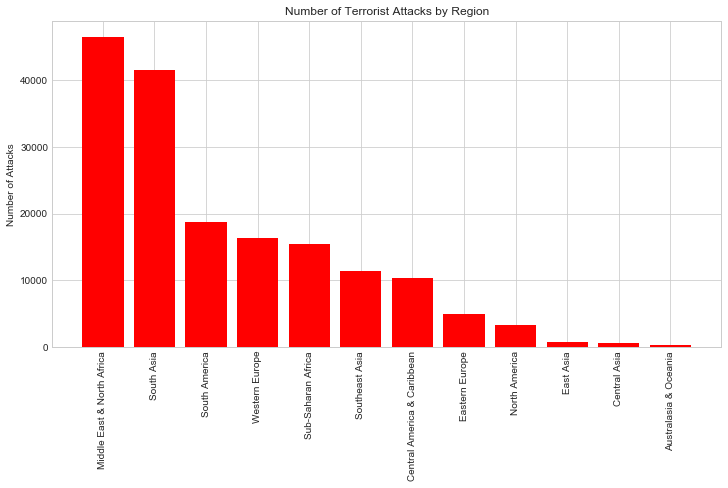

In [26]:
plot_count_by_attribute(get_num_attacks_tuples('region_txt'), 'Region')

Interesting! The Middle East and North Africa, with South Asia as a close second, seem to have around half of all recorded terrorist attacks (out of a total of roughly 170,000). What if we explored the countries?

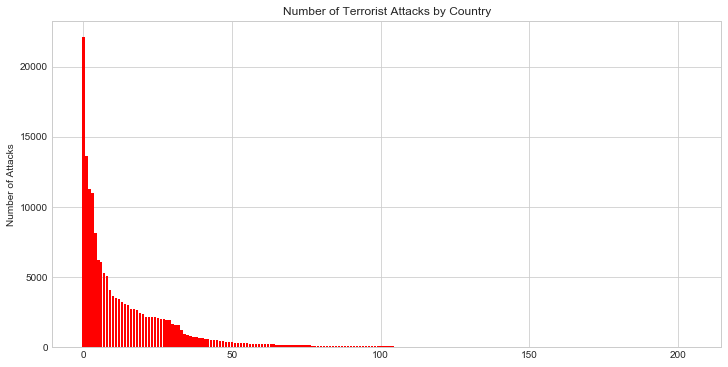

In [27]:
plot_count_by_attribute(get_num_attacks_tuples('country_txt'), 'Country', use_xticks=False)

This time, the observed exponential decay is even more pronounced. What are the top countries here?

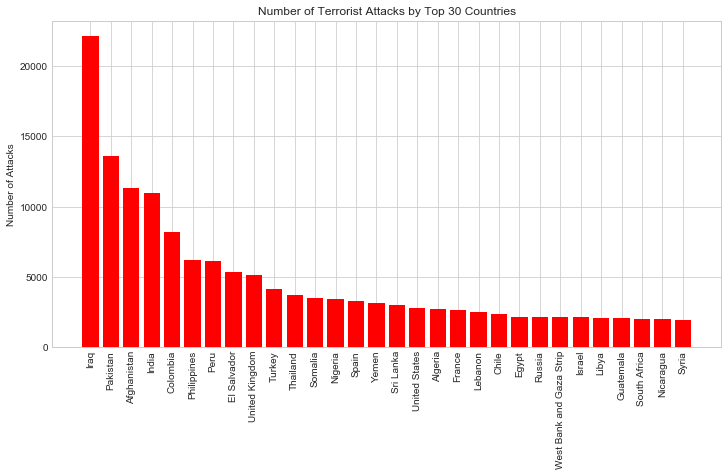

In [28]:
plot_count_by_attribute(get_num_attacks_tuples('country_txt')[:30], 'Top 30 Countries')

Unsurprisingly, the 30 countries with the most recorded terrorist attacks are mostly from the Middle East and North Africa. The top 3 countries - Iraq, Pakistan, and Afghanistan - alone account for about a quarter of the recorded attacks. The UK and US, while making it into the top 30, are numbers 9 and 17 respectively. 

Let's explore other attributes.

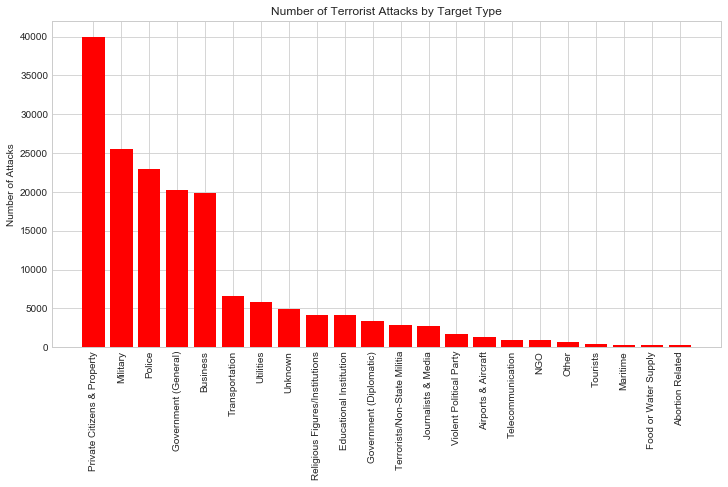

In [29]:
plot_count_by_attribute(get_num_attacks_tuples('targtype1_txt'), 'Target Type')

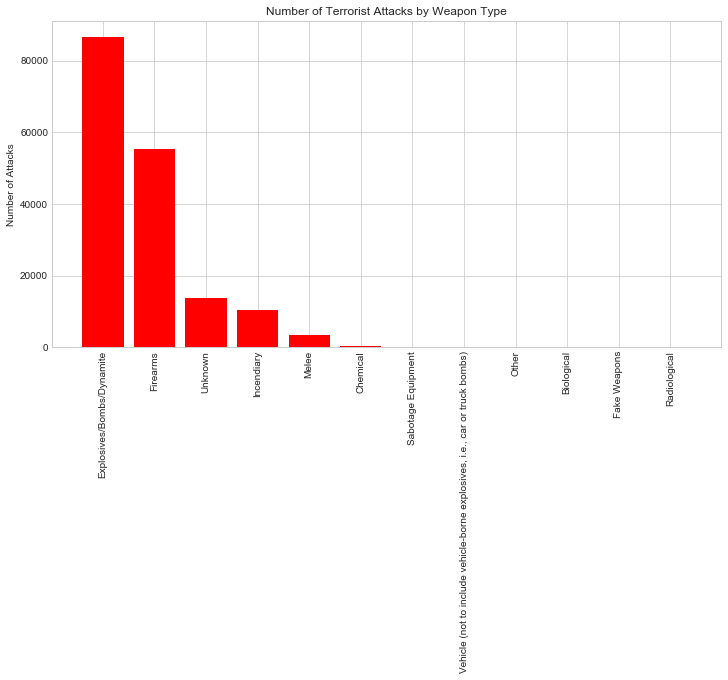

In [30]:
plot_count_by_attribute(get_num_attacks_tuples('weaptype1_txt'), 'Weapon Type')

### Most Prominent Terrorist Groups

Finally, we'll explore the terrorist groups in our dataset. Using the number of attacks seems like a better proxy for this than the percent of successful attacks, since a relatively small but effective terrorist group is less relevant than one which fails quite regularly but carries out many attacks.

First, let's look at the number of terrorist groups in the dataset.

In [34]:
len(raw['gname'].unique())

3454

In [38]:
top_terror_groups = get_num_attacks_tuples('gname', min_number_attacks=500)

[('Taliban', 6575),
 ('Shining Path (SL)', 4551),
 ('Islamic State of Iraq and the Levant (ISIL)', 4287),
 ('Farabundo Marti National Liberation Front (FMLN)', 3351),
 ('Al-Shabaab', 2683),
 ('Irish Republican Army (IRA)', 2669),
 ('Revolutionary Armed Forces of Colombia (FARC)', 2481),
 ("New People's Army (NPA)", 2414),
 ("Kurdistan Workers' Party (PKK)", 2152),
 ('Boko Haram', 2077),
 ('Basque Fatherland and Freedom (ETA)', 2024),
 ('Communist Party of India - Maoist (CPI-Maoist)', 1766),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 1606),
 ('National Liberation Army of Colombia (ELN)', 1483),
 ('Maoists', 1424),
 ('Tehrik-i-Taliban Pakistan (TTP)', 1252),
 ('Palestinians', 1124),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 975),
 ('Nicaraguan Democratic Force (FDN)', 895),
 ('Houthi extremists (Ansar Allah)', 893),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 830),
 ('Sikh Extremists', 714),
 ('Corsican National Liberation Front (FLNC)', 639),
 ('Al-Qaida in Iraq', 636),
 ("Donet

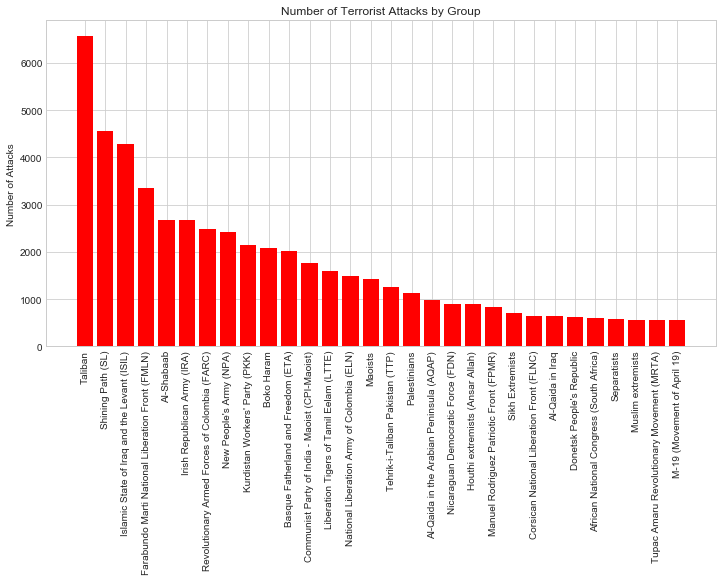

In [39]:
plot_count_by_attribute(top_terror_groups, 'Group')

Similar to the plots for number of attacks by region or weapon type, we can observe an exponential decay in number of attacks by group - meaning the few deadliest groups account for the vast majority of attacks. 

### Discussion 

Unlike success rates, the number of attacks seems to follow an exponentially decaying distribution for all of the attributes considered. Whether considering region, country, weapon type, or attack type, the lion's share of attacks occur only in a few buckets. 

Given that success rates don't seem to vary much across these factors, this skewing of the data is not that significant for analysis purposes. However, it does matter if one has a more specific objective than simply maximizing attack prevention. For example, if one is interested in preventing attacks on a particular nation, or a particular kind of attack, this would imply a different strategy than the results of a holistic analysis.

## Conclusion

We found that across many factors that we expect to have significance for terrorist attack outcomes (such as region, weapon type, or target type), there is not much variance in the success rate of terrorist attacks. However, this analysis is only exploratory and it might be the case that combinations of many features yield greater spread in success rates. 

Unlike success rates, there is substantial variance in the *number* of terrorist attacks with respect to region, weapon type, and target type. From a couter-terrorism perspective, this is more interesting - it indicates that operatives should concentrate their resources on the the places and groups which are the most troublesome.

## Intermediate Results Storage

We'll store a few of the results already calculated for later notebooks.

In [42]:
import shelve

with shelve.open('intermediate_results/vars1') as db:
    db['top_terror_groups'] = top_terror_groups